In [73]:
import pandas as pd

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [74]:
tweets = pd.read_json("/Users/sam/Documents/Masters/Data_Systems_Project/Locations/user_locations.json")

In [75]:
import pandas as pd
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
from string import punctuation
import numpy as np
import re

In [76]:
#clear hyperlinks
def clean_hyperlinks(text):
    result = re.sub(r'https?://[^\s<>"]+|www\.[^\s<>"]+'," ", str(text))
    return result

tweets['text'] = tweets['text'].apply(clean_hyperlinks)

In [77]:
#clear hyperlinks
def clean_hyperlinks(text):
    result = re.sub(r'https?://[^\s<>"]+|www\.[^\s<>"]+'," ", str(text))
    return result

tweets['text'] = tweets['text'].apply(clean_hyperlinks)

#take out hashtags and mentions
def string_manipulation(df,column): 
    df["hashtag"]  = df[column].str.findall(r'#.*?(?=\s|$)')
    df["accounts"] = df[column].str.findall(r'@.*?(?=\s|$)')
    return df
tweets = string_manipulation(tweets,"text")
#make list of al hashtags found
tweets['hashtag']=tweets['hashtag'].apply(str)
tweets['hashtag'] = tweets['hashtag'].apply(lambda x: ','.join(map(str, x)))

#take out hashtags sign and make everything lowercase
def inlist(text): 
    result = text.replace("#", "")
    result = result.lower()
    result = text.split(",")
    return result
tweets['hashtag'] = tweets['hashtag'].apply(inlist)

#make list of tweets
list_of_tweets = []
for tweet in tweets['text']:
    temp = tweet
    list_of_tweets.append(temp)

# Create a set of stopwords
stop = set(stopwords.words('english'))

# Create a set of punctuation words 
exclude = set(string.punctuation) 

# This is the function makeing the lemmatization
lemma = WordNetLemmatizer()

# In this function we perform the entire cleaning
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# This is the clean corpus.
tweets['token'] = [clean(doc).split() for doc in list_of_tweets]

### From here vader sentiment analysis

In [90]:
#give sentiments using sentiment analyser
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(text)
    return score['compound']
    #lb = score['compound']
    #if lb >= 0.05:
    #    return 1
    #elif (lb > -0.05) and (lb < 0.05):
    #    return 0
    #else:
    #    return -1

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sam/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [91]:
tweets['sentiment2'] = np.nan
tweets['sentiment2'] = tweets['text'].apply(sentiment_analyzer_scores)

In [88]:
tweets.sentiment2.value_counts()

-1    779432
 0    654649
 1    654141
Name: sentiment, dtype: int64

[Text(0, 0.5, '#Tweets'),
 Text(0.5, 0, 'Negative                Neutral                 Positive'),
 Text(0.5, 1.0, 'Tweets')]

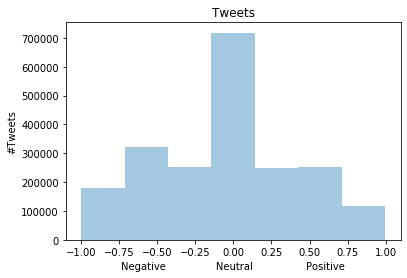

In [99]:
ax = sns.distplot(
        tweets['sentiment2'],
        kde=False,
        bins=7)
ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='#Tweets',
          title="Tweets")